**Denoise using Filter**

Gaussian Blur, Median Blur và Bilateral Filter là các phương pháp giảm nhiễu dựa vào lân cận. Tức là, chúng ta sử dụng một nhóm các lân cận của pixel, thực hiện các tính toán và đưa ra giá trị mới cho pixel đó.

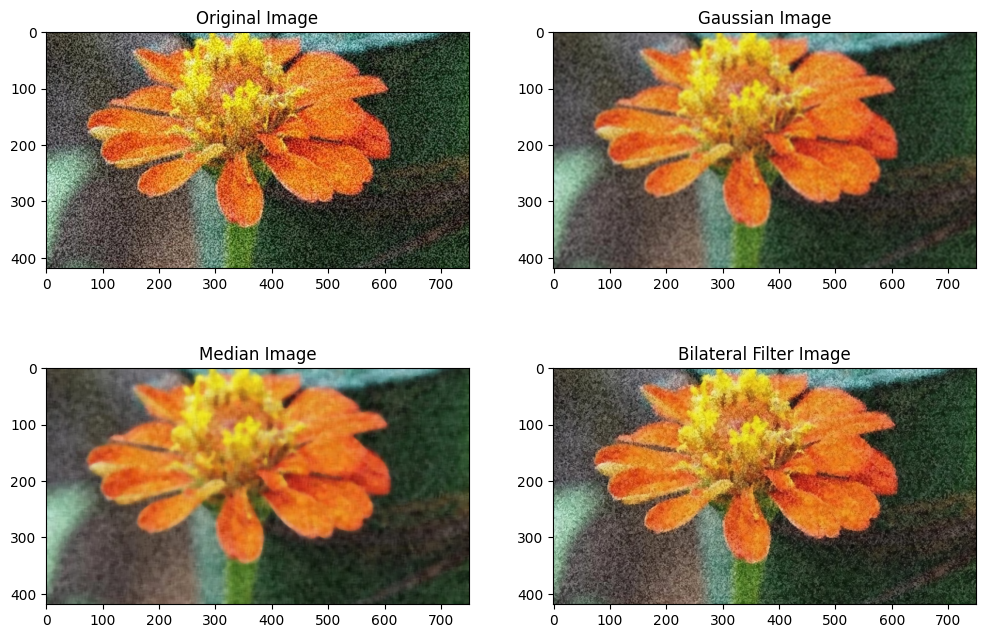

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('noise.jpg')

gaussian_blur = cv2.GaussianBlur(src=image, ksize=(9,9), sigmaX=0, sigmaY=0)
median_blur = cv2.medianBlur(src=image, ksize=9)
bilateral_filter = cv2.bilateralFilter(src=image, d=9, sigmaColor=75, sigmaSpace=75)

plt.figure(figsize=[12,8])
plt.subplot(221); plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.title("Original Image")
plt.subplot(222); plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB)); plt.title("Gaussian Image")
plt.subplot(223); plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB)); plt.title("Median Image")
plt.subplot(224); plt.imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB)); plt.title("Bilateral Filter Image")
plt.show()

**Non-Local Means Denoising**

Có một đặc tính của nhiễu đó là nhiễu có giá trị trung bình bằng 0. Dẫn đến một ý tưởng giảm nhiễu đó là sử dụng một tập hình ảnh tương tự để tính giá trị trung bình của tập hình ảnh đó, theo như đặc tính trên thì nhiễu sẽ về 0.

Đơn giản hơn, thay vì sử dụng nhóm ảnh tương tự thì có thể dùng một ảnh dựa trên ý tưởng rằng các điểm ảnh trong một ảnh tự nhiên có mối quan hệ với các điểm ảnh khác không chỉ ở gần nhau mà còn ở xa nhau. Phương pháp này gọi là phương pháp khử nhiễu trung bình phi cục bộ (Non-Local Means Denoising).

Cách thức hoạt động của Non-Local Means Denoising để xác định giá trị mới v'(i) cho điểm ảnh i (có giá trị v(i)):

--> Thứ nhất, chúng ta có hai tham số templateWindowSize và searchWindowSize trong đó templateWindowSize sẽ là kích thước của sổ mẫu (ví dụ size 7x7 thì sẽ sử dụng một mẫu 7x7 lấy điểm i làm trung tâm và tính tương đồng với các vùng có kích thước 7x7 khác lấy điểm j làm trung tâm), searchWindowSize sẽ là kích thước của cửa số dùng để lấy các điểm ảnh j và tính toán tương quan (ví dụ size 21x21 thì với mỗi điểm ảnh j trong cửa sổ lớn, một patch centered tại j sẽ được so sánh với patch centered tại i.

--> Thứ hai, sự tương đồng giữa các patch được tính toán bằng cách sử dụng khoảng cách Euclidean giữa hai patch, sau đó áp dụng một hàm Gaussian để có trọng số tương đồng. Công thức tính trọng số cho các Patch(j) như sau: 
 
 

Trong đó:

- ∥Pi​ − Pj∥^2 là khoảng cách Euclidean giữa hai patches.
- h là là tham số điều khiển mức độ smoothing. Giá trị h cao hơn sẽ loại bỏ nhiễu tốt hơn nhưng cũng loại bỏ các chi tiết của hình ảnh. (nên chọn là 10)
- Z(i) là hằng số để chuẩn hóa trọng số sao cho tổng các trọng số bằng 1.

--> Thứ ba, Tính giá trị mới cho điểm ảnh: Giá trị mới cho điểm ảnh 𝑖 được tính bằng trung bình có trọng số của các giá trị pixel trong cửa sổ lớn, với trọng số dựa trên sự tương đồng của các patch: 

OpenCV cung cấp bốn biến thể của kỹ thuật này.

- cv.fastNlMeansDenoising() - hoạt động với một hình ảnh thang độ xám
- cv.fastNlMeansDenoisingColored() - hoạt động với hình ảnh màu.
- cv.fastNlMeansDenoisingMulti() - hoạt động với chuỗi hình ảnh được chụp trong khoảng thời gian ngắn (hình ảnh thang độ xám)
- cv.fastNlMeansDenoisingColoredMulti() - tương tự như trên, nhưng dành cho hình ảnh màu.

Một số tham số:

- h : tham số quyết định cường độ lọc. Giá trị h cao hơn sẽ loại bỏ nhiễu tốt hơn nhưng cũng loại bỏ các chi tiết của hình ảnh. (nên là 10)
- hForColorComponents : giống như h, nhưng chỉ dành cho ảnh màu.
- templateWindowSize : phải là số lẻ. (nên là 7)
- searchWindowSize : phải là số lẻ. (nên là 21)

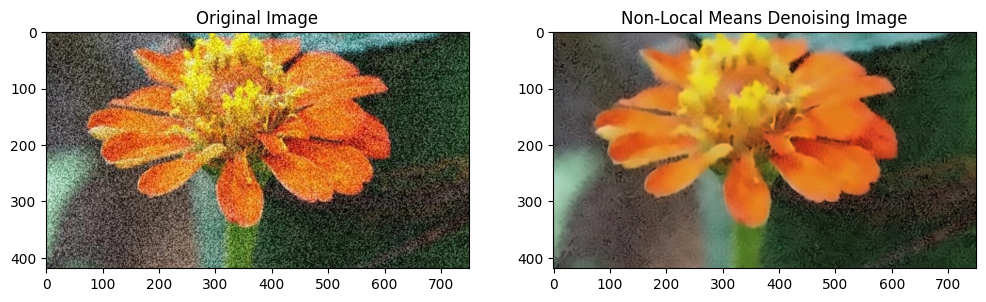

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('noise.jpg')

# cv2.fastNlMeansDenoisingColored(img_src, img_dst, h, hForColorComponents, templateWindowSize, searchWindowSize)
nlmd_image = cv2.fastNlMeansDenoisingColored(image, None, 20, 20, 7, 21)

plt.figure(figsize=[12,6])
plt.subplot(121); plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.title("Original Image")
plt.subplot(122); plt.imshow(cv2.cvtColor(nlmd_image, cv2.COLOR_BGR2RGB)); plt.title("Non-Local Means Denoising Image")
plt.show()